## Image Classification (CNN) with TensorFlow

In [1]:
import numpy as np
from keras.utils import np_utils
from tflearn.data_utils import shuffle
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [8]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [26]:
BATCH_SIZE = 128
nb_epochs = 10
VALIDATION_SPLIT = 0.2
num_classes = 10

In [21]:
"One hot encoding Y values train and test:"
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

The cifar holds a dict object returned by unpickle. (read more about the dict object returned by the
function at https://www.cs.utoronto.ca/~kriz/cifar.html).
Note: Performance analysis with respect to the number of workers is not required in this exercise
sheet.
For this lab you will the network following architecture. You will build a network with the following
components (see [6, 7] for more details about components)
1. conv1: convolution and rectified linear activation (RELU)
2. pool1: max pooling
3. conv2: convolution and rectified linear activation (RELU)
4. pool2: max pooling
5. FC1: fully connected layer with rectified linear activation (RELU)
6. FC2: fully connected layer with rectified linear activation (RELU)
7. softmax layer: final output predictions i.e. classify into one of the ten classes.


In [22]:
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`


In [24]:
model1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model_history  = model1.fit(X_train, y_train, 
                                 batch_size=BATCH_SIZE, epochs=nb_epochs, verbose=1,
                                 callbacks=None, validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 168s 4ms/step - loss: 2.0804 - acc: 0.2607 - val_loss: 1.9810 - val_acc: 0.3038
Epoch 2/10
40000/40000 [==============================] - 169s 4ms/step - loss: 1.8966 - acc: 0.3313 - val_loss: 1.8613 - val_acc: 0.3435
Epoch 3/10
40000/40000 [==============================] - 159s 4ms/step - loss: 1.7821 - acc: 0.3716 - val_loss: 1.7453 - val_acc: 0.3813
Epoch 4/10
40000/40000 [==============================] - 168s 4ms/step - loss: 1.6900 - acc: 0.4054 - val_loss: 1.7167 - val_acc: 0.3826
Epoch 5/10
40000/40000 [==============================] - 161s 4ms/step - loss: 1.6110 - acc: 0.4300 - val_loss: 1.6336 - val_acc: 0.4155
Epoch 6/10
40000/40000 [==============================] - 161s 4ms/step - loss: 1.5448 - acc: 0.4544 - val_loss: 1.5830 - val_acc: 0.4285
Epoch 7/10
40000/40000 [==============================] - 158s 4ms/step - loss: 1.4853 - acc: 0.4760 - val_loss: 1.5210 - 

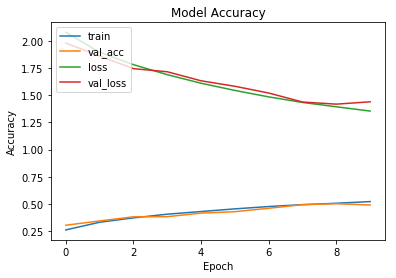

In [28]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val_acc','loss','val_loss'], loc = 'upper left')
plt.show()

The top two lines are representing `training` and `valiadtion accuracy` and the below two lines are representing `training loss` and the `validation loss`

In [52]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

In [54]:
datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
datagen.fit(X_train)
model_aug = model1
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

### Exercise - 02

In [56]:
model_2 = Sequential()
model_2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))
model_2.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`


In [57]:
model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
second_model_history  = model_2.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs,
                           validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 209s 5ms/step - loss: 2.2686 - acc: 0.1485 - val_loss: 2.1995 - val_acc: 0.2690
Epoch 2/10
40000/40000 [==============================] - 226s 6ms/step - loss: 2.0624 - acc: 0.2429 - val_loss: 2.0724 - val_acc: 0.3039
Epoch 3/10
40000/40000 [==============================] - 206s 5ms/step - loss: 1.9673 - acc: 0.2857 - val_loss: 1.9908 - val_acc: 0.3431
Epoch 4/10
40000/40000 [==============================] - 217s 5ms/step - loss: 1.9004 - acc: 0.3202 - val_loss: 1.9206 - val_acc: 0.3666
Epoch 5/10
40000/40000 [==============================] - 187s 5ms/step - loss: 1.8210 - acc: 0.3510 - val_loss: 1.8560 - val_acc: 0.3952
Epoch 6/10
40000/40000 [==============================] - 185s 5ms/step - loss: 1.7591 - acc: 0.3709 - val_loss: 1.7863 - val_acc: 0.4236
Epoch 7/10
40000/40000 [==============================] - 183s 5ms/step - loss: 1.7036 - acc: 0.3915 - val_loss: 1.7464 - 

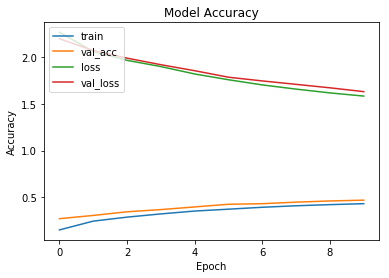

In [61]:
plt.plot(second_model_history.history['acc'])
plt.plot(second_model_history.history['val_acc'])
plt.plot(second_model_history.history['loss'])
plt.plot(second_model_history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val_acc','loss','val_loss'], loc = 'upper left')
plt.show()

again the top two lines are representing `training` and `valiadtion accuracy` and the below two lines are representing `training loss` and the `validation loss`

## Optimizer 

Optimization algorithms helps us to minimize (or maximize) an `Objective function` (another name for Error function) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the `target values(Y)` from the set of `predictors(X)` used in the model.

For example — we call the `Weights(W)` and the `Bias(b)` values of the neural network as its internal learnable parameters which are used in computing the output values and are learned and updated in the direction of optimal solution i.e minimizing the Loss by the network’s training process and also play a major role in the training process of the Neural Network Model .

In [62]:
model_3 = Sequential()
model_3.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))
model_3.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model_3.add(Dropout(0.5))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  from ipykernel import kernelapp as app
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`


In [63]:
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Adam stands for Adaptive Moment Estimation. Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta ,Adam also keeps an exponentially decaying average of past gradients M(t), similar to momentum.

In [64]:
third_model_history  = model_3.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = 10,
                           validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 194s 5ms/step - loss: 1.7490 - acc: 0.3641 - val_loss: 1.5698 - val_acc: 0.4634
Epoch 2/10
40000/40000 [==============================] - 205s 5ms/step - loss: 1.4083 - acc: 0.4933 - val_loss: 1.4182 - val_acc: 0.5570
Epoch 3/10
40000/40000 [==============================] - 199s 5ms/step - loss: 1.2828 - acc: 0.5412 - val_loss: 1.2925 - val_acc: 0.5860
Epoch 4/10
40000/40000 [==============================] - 201s 5ms/step - loss: 1.2034 - acc: 0.5668 - val_loss: 1.2052 - val_acc: 0.6254
Epoch 5/10
40000/40000 [==============================] - 194s 5ms/step - loss: 1.1331 - acc: 0.5951 - val_loss: 1.1477 - val_acc: 0.6432
Epoch 6/10
40000/40000 [==============================] - 192s 5ms/step - loss: 1.0863 - acc: 0.6127 - val_loss: 1.0823 - val_acc: 0.6582
Epoch 7/10
40000/40000 [==============================] - 192s 5ms/step - loss: 1.0433 - acc: 0.6300 - val_loss: 1.0737 - 

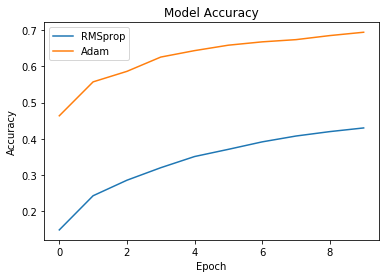

In [67]:
plt.plot(second_model_history.history['acc'])
plt.plot(third_model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['RMSprop','Adam',], loc = 'upper left')
plt.show()

Adam is performing better thatn RMSprop 